<a href="https://colab.research.google.com/github/AbduzZami/ColabNotebooks/blob/main/Deblur_Compare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install lpips

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 71.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [3]:
!pip install piq

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abduzzami/compare-deblur")

print("Path to dataset files:", path)

100%|██████████| 439M/439M [00:05<00:00, 77.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/abduzzami/compare-deblur/versions/1


In [ ]:
path

'/root/.cache/kagglehub/datasets/abduzzami/compare-deblur/versions/1'

In [ ]:
# prompt: check files inside path

import os

print(os.listdir(path))


['Compare']


In [ ]:
# os.listdir(path+'/Compare/CodeFormer')

['blurred_image7.png',
 'blurred_image41.png',
 'blurred_image108.png',
 'blurred_image192.png',
 'blurred_image100.png',
 'blurred_image179.png',
 'blurred_image112.png',
 'blurred_image94.png',
 'blurred_image105.png',
 'blurred_image153.png',
 'blurred_image139.png',
 'blurred_image59.png',
 'blurred_image43.png',
 'blurred_image174.png',
 'blurred_image93.png',
 'blurred_image23.png',
 'blurred_image115.png',
 'blurred_image121.png',
 'blurred_image169.png',
 'blurred_image143.png',
 'blurred_image110.png',
 'blurred_image86.png',
 'blurred_image6.png',
 'blurred_image196.png',
 'blurred_image19.png',
 'blurred_image99.png',
 'blurred_image132.png',
 'blurred_image168.png',
 'blurred_image137.png',
 'blurred_image42.png',
 'blurred_image96.png',
 'blurred_image191.png',
 'blurred_image65.png',
 'blurred_image123.png',
 'blurred_image135.png',
 'blurred_image63.png',
 'blurred_image5.png',
 'blurred_image51.png',
 'blurred_image162.png',
 'blurred_image185.png',
 'blurred_image175.p

In [ ]:
# import os
# import cv2
# import numpy as np
# import pandas as pd
# from skimage.metrics import structural_similarity as ssim

# def compute_metrics(img1, img2):
#     # Resize img2 to match img1's dimensions
#     img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

#     psnr_value = cv2.PSNR(img1, img2)

#     # Ensure minimum size for SSIM
#     win_size = min(7, min(img1.shape[:2]))

#     ssim_value = ssim(img1, img2, channel_axis=-1, data_range=img2.max() - img2.min(), win_size=win_size)
#     return psnr_value, ssim_value

# # Define folder paths
# folders = [path+'/Compare/CodeFormer', path+'/Compare/RestoreFormer', path+'/Compare/RestoreFormerPP', path+'/Compare/Blurred', path+'/Compare/Deblurred', path+'/Compare/GFPGAN']
# original_folder = path+'/Compare/Original'

# # Get sorted filenames from each folder
# filenames_original = sorted(os.listdir(original_folder))
# folder_files = {folder: sorted(os.listdir(folder)) for folder in folders}

# # Store results
# results = []

# for idx, filename in enumerate(filenames_original):
#     original_path = os.path.join(original_folder, filename)
#     if not os.path.isfile(original_path):
#         continue

#     original_img = cv2.imread(original_path)

#     for folder in folders:
#         if idx >= len(folder_files[folder]):
#             continue

#         test_filename = folder_files[folder][idx]
#         test_path = os.path.join(folder, test_filename)

#         if not os.path.isfile(test_path):
#             continue

#         test_img = cv2.imread(test_path)

#         # Compute SSIM and PSNR
#         psnr_value, ssim_value = compute_metrics(original_img, test_img)

#         results.append([test_filename, folder, psnr_value, ssim_value])

# # Convert results to DataFrame and save to CSV
# df = pd.DataFrame(results, columns=['Filename', 'Folder', 'PSNR', 'SSIM'])
# df.to_csv('ssim_psnr_results.csv', index=False)

# print("Metrics computed and saved to ssim_psnr_results.csv")


Metrics computed and saved to ssim_psnr_results.csv


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from metrics.image_quality import psnr, ssim, mse, niqe, fid

def compute_metrics(img1, img2):
    # Resize img2 to match img1's dimensions
    img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

    # PSNR
    psnr_value = psnr(img1, img2)

    # SSIM
    ssim_value = ssim(img1, img2)

    # Convert images to tensors for LPIPS
    img1_tensor = torch.from_numpy(img1.transpose(2, 0, 1)).float() / 255.0
    img2_tensor = torch.from_numpy(img2.transpose(2, 0, 1)).float() / 255.0

    # LPIPS
    loss_fn = lpips.LPIPS(net='alex')  # Using AlexNet as backbone
    lpips_value = loss_fn(img1_tensor.unsqueeze(0), img2_tensor.unsqueeze(0)).item()

    #MSE
    mse_value = mse(img1, img2)

    #NIQE
    niqe_value = niqe(img1)

    #FID
    fid_value = fid(img1, img2)

    return psnr_value, ssim_value, lpips_value, mse_value, niqe_value, fid_value

# Define folder paths (ensure 'path' is defined before running)
folders = [path+'/Compare/CodeFormer', path+'/Compare/RestoreFormer', path+'/Compare/RestoreFormerPP',
           path+'/Compare/Blurred', path+'/Compare/Deblurred', path+'/Compare/GFPGAN']
original_folder = path+'/Compare/Original'

# Get sorted filenames from each folder
filenames_original = sorted(os.listdir(original_folder))
folder_files = {folder: sorted(os.listdir(folder)) for folder in folders}

# Store results
results = []
folder_metrics = {folder: {'psnr': [], 'ssim': [], 'lpips': []} for folder in folders}

for idx, filename in enumerate(filenames_original):
    original_path = os.path.join(original_folder, filename)
    if not os.path.isfile(original_path):
        continue

    original_img = cv2.imread(original_path)

    for folder in folders:
        if idx >= len(folder_files[folder]):
            continue

        test_filename = folder_files[folder][idx]
        test_path = os.path.join(folder, test_filename)

        if not os.path.isfile(test_path):
            continue

        test_img = cv2.imread(test_path)

        # Compute all metrics
        psnr_value, ssim_value, lpips_value, mse_value, niqe_value, fid_value = compute_metrics(original_img, test_img)

        results.append([test_filename, folder, psnr_value, ssim_value, lpips_value])
        folder_metrics[folder]['psnr'].append(psnr_value)
        folder_metrics[folder]['ssim'].append(ssim_value)
        folder_metrics[folder]['lpips'].append(lpips_value)
        folder_metrics[folder]['mse'].append(mse_value)
        folder_metrics[folder]['niqe'].append(niqe_value)
        folder_metrics[folder]['fid'].append(fid_value)

# Convert results to DataFrame and save to CSV
df = pd.DataFrame(results, columns=['Filename', 'Folder', 'PSNR', 'SSIM', 'LPIPS', 'MSE', 'NIQE', 'FID'])
df.to_csv('image_quality_metrics.csv', index=False)

# Compute mean metrics for each folder
mean_results = []
for folder, metrics in folder_metrics.items():
    mean_psnr = np.mean(metrics['psnr']) if metrics['psnr'] else 0
    mean_ssim = np.mean(metrics['ssim']) if metrics['ssim'] else 0
    mean_lpips = np.mean(metrics['lpips']) if metrics['lpips'] else 0
    mean_results.append([folder, mean_psnr, mean_ssim, mean_lpips])

# Save mean results to CSV
df_mean = pd.DataFrame(mean_results, columns=['Folder', 'Mean_PSNR', 'Mean_SSIM', 'Mean_LPIPS'])
df_mean.to_csv('mean_image_quality_metrics.csv', index=False)

print("Metrics computed and saved to image_quality_metrics.csv")
print("Mean metrics computed and saved to mean_image_quality_metrics.csv")

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth
Setting up [LPIPS] perceptual loss: trun

KeyboardInterrupt: 

In [ ]:
df.head()

,Filename,Folder,PSNR,SSIM
0,blurred_image1.png,/root/.cache/kagglehub/datasets/abduzzami/comp...,22.647956,0.559026
1,blurred_image1.png,/root/.cache/kagglehub/datasets/abduzzami/comp...,22.385131,0.547389
2,blurred_image1.png,/root/.cache/kagglehub/datasets/abduzzami/comp...,22.131780,0.526189
3,blurred_image1.png,/root/.cache/kagglehub/datasets/abduzzami/comp...,21.977617,0.511091
4,deblurred_image1.png,/root/.cache/kagglehub/datasets/abduzzami/comp...,23.211312,0.535759


In [ ]:
# import os
# import cv2
# import numpy as np
# import pandas as pd
# from skimage.metrics import structural_similarity as ssim

# def compute_metrics(img1, img2):
#     # Resize img2 to match img1's dimensions
#     img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

#     psnr_value = cv2.PSNR(img1, img2)

#     # Ensure minimum size for SSIM
#     win_size = min(7, min(img1.shape[:2]))

#     ssim_value = ssim(img1, img2, channel_axis=-1, data_range=img2.max() - img2.min(), win_size=win_size)
#     return psnr_value, ssim_value

# # Define folder paths
# folders = [path+'/Compare/CodeFormer', path+'/Compare/RestoreFormer', path+'/Compare/RestoreFormerPP', path+'/Compare/Blurred', path+'/Compare/Deblurred', path+'/Compare/GFPGAN']
# original_folder = path+'/Compare/Original'

# # Get sorted filenames from each folder
# filenames_original = sorted(os.listdir(original_folder))
# folder_files = {folder: sorted(os.listdir(folder)) for folder in folders}

# # Store results
# results = []
# folder_metrics = {folder: {'psnr': [], 'ssim': []} for folder in folders}

# for idx, filename in enumerate(filenames_original):
#     original_path = os.path.join(original_folder, filename)
#     if not os.path.isfile(original_path):
#         continue

#     original_img = cv2.imread(original_path)

#     for folder in folders:
#         if idx >= len(folder_files[folder]):
#             continue

#         test_filename = folder_files[folder][idx]
#         test_path = os.path.join(folder, test_filename)

#         if not os.path.isfile(test_path):
#             continue

#         test_img = cv2.imread(test_path)

#         # Compute SSIM and PSNR
#         psnr_value, ssim_value = compute_metrics(original_img, test_img)

#         results.append([test_filename, folder, psnr_value, ssim_value])
#         folder_metrics[folder]['psnr'].append(psnr_value)
#         folder_metrics[folder]['ssim'].append(ssim_value)

# # Convert results to DataFrame and save to CSV
# df = pd.DataFrame(results, columns=['Filename', 'Folder', 'PSNR', 'SSIM'])
# df.to_csv('ssim_psnr_results.csv', index=False)

# # Compute mean PSNR and SSIM for each folder
# mean_results = []
# for folder, metrics in folder_metrics.items():
#     mean_psnr = np.mean(metrics['psnr']) if metrics['psnr'] else 0
#     mean_ssim = np.mean(metrics['ssim']) if metrics['ssim'] else 0
#     mean_results.append([folder, mean_psnr, mean_ssim])

# # Save mean results to CSV
# df_mean = pd.DataFrame(mean_results, columns=['Folder', 'Mean_PSNR', 'Mean_SSIM'])
# df_mean.to_csv('mean_ssim_psnr_results.csv', index=False)

# print("Metrics computed and saved to ssim_psnr_results.csv")
# print("Mean metrics computed and saved to mean_ssim_psnr_results.csv")

KeyboardInterrupt: 

In [ ]:
df_mean

,Folder,Mean_PSNR,Mean_SSIM
0,/root/.cache/kagglehub/datasets/abduzzami/comp...,22.594790,0.597722
1,/root/.cache/kagglehub/datasets/abduzzami/comp...,22.914940,0.615396
2,/root/.cache/kagglehub/datasets/abduzzami/comp...,22.880480,0.616674
3,/root/.cache/kagglehub/datasets/abduzzami/comp...,22.432657,0.590689
4,/root/.cache/kagglehub/datasets/abduzzami/comp...,23.462150,0.682138
5,/root/.cache/kagglehub/datasets/abduzzami/comp...,22.990037,0.625591


In [5]:
!pip install mmetrics

In [ ]:
import cv2
import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
import torch
import lpips
import piq


# Load images as RGB
img1 = cv2.imread('/content/deblurred_image200.png')
img2 = cv2.imread('/content/original_image200.png')

# Convert from BGR to RGB
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

from metrics.image_quality import psnr, ssim, mse, niqe, fid

print(psnr(img1, img2))
print(ssim(img1, img2))
print(mse(img1, img2))
print(niqe(img1))

#lpips


24.24930764243108
0.9566297062788146
244.42723592122397
0.21778302376627476


In [ ]:
import cv2
import numpy as np
import torch
import lpips
import piq

# Load images as RGB
img1 = cv2.imread('/content/deblurred_image200.png')
img2 = cv2.imread('/content/original_image200.png')

# Convert from BGR to RGB
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Initialize LPIPS model (using AlexNet by default)
loss_fn = lpips.LPIPS(net='alex')  # You can also use 'vgg' or 'squeeze'

# Convert images to PyTorch tensors and normalize to [-1, 1]
# LPIPS expects shape (N, 3, H, W) and values in [-1, 1]
img1_tensor = torch.from_numpy(img1).permute(2, 0, 1).float() / 255.0 * 2 - 1
img2_tensor = torch.from_numpy(img2).permute(2, 0, 1).float() / 255.0 * 2 - 1

# Add batch dimension
img1_tensor = img1_tensor.unsqueeze(0)
img2_tensor = img2_tensor.unsqueeze(0)

# Calculate LPIPS
lpips_score = loss_fn(img1_tensor, img2_tensor)

# Your existing metrics
from metrics.image_quality import psnr, ssim, mse, niqe, fid

print("PSNR:", psnr(img1, img2))
print("SSIM:", ssim(img1, img2))
print("MSE:", mse(img1, img2))
print("NIQE:", niqe(img1))
print("LPIPS:", lpips_score.item())  # .item() to get scalar value from tensor

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth
PSNR: 24.24930764243108
SSIM: 0.9566297062788146
MSE: 244.42723592122397
NIQE: 0.21778302376627476
LPIPS: 0.34603989124298096


In [ ]:
import cv2
import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
import torch
import lpips
import piq

# Load images as RGB
img1 = cv2.imread('/content/deblurred_image200.png')
img2 = cv2.imread('/content/original_image200.png')

# Convert from BGR to RGB
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Initialize LPIPS model
loss_fn = lpips.LPIPS(net='alex')

# Convert images to PyTorch tensors for LPIPS (normalized to [-1, 1])
img1_tensor_lpips = torch.from_numpy(img1).permute(2, 0, 1).float() / 255.0 * 2 - 1
img2_tensor_lpips = torch.from_numpy(img2).permute(2, 0, 1).float() / 255.0 * 2 - 1
img1_tensor_lpips = img1_tensor_lpips.unsqueeze(0)
img2_tensor_lpips = img2_tensor_lpips.unsqueeze(0)

# Convert images to PyTorch tensors for MS-SSIM (normalized to [0, 1])
img1_tensor_ms = torch.from_numpy(img1).permute(2, 0, 1).float() / 255.0
img2_tensor_ms = torch.from_numpy(img2).permute(2, 0, 1).float() / 255.0
img1_tensor_ms = img1_tensor_ms.unsqueeze(0)
img2_tensor_ms = img2_tensor_ms.unsqueeze(0)

# Calculate LPIPS
lpips_score = loss_fn(img1_tensor_lpips, img2_tensor_lpips)

# Calculate MS-SSIM
ms_ssim_score = piq.multi_scale_ssim(img1_tensor_ms, img2_tensor_ms, data_range=1.0)

# Your existing metrics
from metrics.image_quality import psnr, ssim, mse, niqe, fid

print("PSNR:", psnr(img1, img2))
print("SSIM:", ssim(img1, img2))
print("MS-SSIM:", ms_ssim_score.item())  # .item() to get scalar value from tensor
print("MSE:", mse(img1, img2))
print("NIQE:", niqe(img1))
print("LPIPS:", lpips_score.item())

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth
PSNR: 24.24930764243108
SSIM: 0.9566297062788146
MS-SSIM: 0.8864250183105469
MSE: 244.42723592122397
NIQE: 0.21778302376627476
LPIPS: 0.34603989124298096


In [ ]:
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
import cv2
import numpy as np

# Load images
img1 = cv2.imread('/content/deblurred_image200.png')
img2 = cv2.imread('/content/original_image200.png')

# Convert from BGR to RGB
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Resize img2 to match img1's dimensions if necessary
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

# Get the minimum dimension of the image to determine appropriate win_size
min_dim = min(img1.shape[0], img1.shape[1])
win_size = 255 # Ensure odd number

# Calculate PSNR
psnr_value = psnr(img1, img2, data_range=img1.max() - img1.min())

# Calculate SSIM with explicit win_size and channel_axis
ssim_value = ssim(img1,
                 img2,
                 data_range=img1.max() - img1.min(),
                 win_size=win_size,  # Explicitly set window size
                 channel_axis=2,     # Specify channel axis (2 for RGB in HWC format)
                 gaussian_weights=True)  # Optional: use Gaussian weighting

print(f"PSNR: {psnr_value}")
print(f"SSIM: {ssim_value}")

PSNR: 24.24930764243108
SSIM: 0.9566956251367724


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import torch
import lpips
import piq

from metrics.image_quality import psnr, ssim, mse, niqe, fid

# Initialize LPIPS model (AlexNet by default; options: 'alex', 'vgg', 'squeeze')
loss_fn = lpips.LPIPS(net='alex')

# Define folder paths (replace 'path' with your base directory)
folders = [path+'/Compare/CodeFormer',
           path+'/Compare/RestoreFormer',
           path+'/Compare/RestoreFormerPP',
           path+'/Compare/Blurred',
           path+'/Compare/Deblurred',
           path+'/Compare/GFPGAN']
original_folder = path+'/Compare/Original'

# Get sorted filenames from each folder
filenames_original = sorted(os.listdir(original_folder))
folder_files = {folder: sorted(os.listdir(folder)) for folder in folders}

# Initialize accumulators for each folder
folder_metrics = {
    folder: {'total_psnr': 0.0, 'total_ssim': 0.0, 'total_mse': 0.0,
             'total_niqe': 0.0, 'total_lpips': 0.0, 'total_fid': 0.0, 'count': 0}
    for folder in folders
}

for idx, filename in enumerate(filenames_original):
    original_path = os.path.join(original_folder, filename)

    if not os.path.isfile(original_path):
        continue

    # Load original image in RGB
    original_img_bgr = cv2.imread(original_path)
    if original_img_bgr is None:
        continue
    original_img = cv2.cvtColor(original_img_bgr, cv2.COLOR_BGR2RGB)


    # Convert original image to tensor for LPIPS (shape [1, 3, H, W], range [-1, 1])
    original_tensor = torch.from_numpy(original_img).permute(2, 0, 1).float() / 255.0 * 2 - 1
    original_tensor = original_tensor.unsqueeze(0)

    for folder in folders:
        if idx >= len(folder_files[folder]):
            continue

        test_filename = folder_files[folder][idx]
        test_path = os.path.join(folder, test_filename)

        if not os.path.isfile(test_path):
            continue

        # Load test image in RGB
        test_img_bgr = cv2.imread(test_path)
        if test_img_bgr is None:
            continue
        test_img = cv2.cvtColor(test_img_bgr, cv2.COLOR_BGR2RGB)

        # Resize test image if needed
        if test_img.shape != original_img.shape:
            test_img = cv2.resize(test_img, (original_img.shape[1], original_img.shape[0]))

        # Convert test image to tensor for LPIPS
        test_tensor = torch.from_numpy(test_img).permute(2, 0, 1).float() / 255.0 * 2 - 1
        test_tensor = test_tensor.unsqueeze(0)

        # Calculate metrics
        lpips_score = loss_fn(original_tensor, test_tensor).item()
        psnr_value = psnr(original_img, test_img)
        ssim_value = ssim(original_img, test_img)
        mse_value = mse(original_img, test_img)
        niqe_value = niqe(test_img)
        # fid_value = fid([original_img], [test_img])  # Uncomment if FID is implemented

        # Accumulate metrics for this folder
        folder_metrics[folder]['total_psnr'] += psnr_value
        folder_metrics[folder]['total_ssim'] += ssim_value
        folder_metrics[folder]['total_mse'] += mse_value
        folder_metrics[folder]['total_niqe'] += niqe_value
        folder_metrics[folder]['total_lpips'] += lpips_score
        # folder_metrics[folder]['total_fid'] += fid_value
        folder_metrics[folder]['count'] += 1

# Calculate means for each folder
results = []
for folder in folders:
    count = folder_metrics[folder]['count']
    if count > 0:
        mean_results = {
            'Folder': folder,
            'PSNR': folder_metrics[folder]['total_psnr'] / count,
            'SSIM': folder_metrics[folder]['total_ssim'] / count,
            'MSE': folder_metrics[folder]['total_mse'] / count,
            'NIQE': folder_metrics[folder]['total_niqe'] / count,
            'LPIPS': folder_metrics[folder]['total_lpips'] / count,
            # 'FID': folder_metrics[folder]['total_fid'] / count
        }
        results.append(mean_results)

# Convert to DataFrame and save
df_mean = pd.DataFrame(results)
df_mean.to_csv('mean_quality_metrics_by_folder.csv', index=False)

print("Mean metrics by folder computed and saved to mean_quality_metrics_by_folder.csv")
print(df_mean)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth
Mean metrics by folder computed and saved to mean_quality_metrics_by_folder.csv
                                              Folder       PSNR      SSIM  \
0  /root/.cache/kagglehub/datasets/abduzzami/comp...  22.594790  0.946246   
1  /root/.cache/kagglehub/datasets/abduzzami/comp...  22.914940  0.951758   
2  /root/.cache/kagglehub/datasets/abduzzami/comp...  22.880480  0.952127   
3  /root/.cache/kagglehub/datasets/abduzzami/comp...  22.432657  0.944729   
4  /root/.cache/kagglehub/datasets/abduzzami/comp...  23.462150  0.951385   
5  /root/.cache/kagglehub/datasets/abduzzami/comp...  22.990037  0.953251   

          MSE      NIQE     LPIPS  
0  417.586784  0.256521  0.321053  
1  388.534998  0.261313  0.345021  
2  395.517970  0.259917  0.236815  
3  430.314214  0.258183  0.510803  
4  438.818008  0.266273  0.329684  
5  3

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import torch
import lpips
import piq
from skimage.metrics import structural_similarity as ssim  # Using scikit-image's SSIM
from metrics.image_quality import psnr, mse, niqe, fid  # Assuming these are still from your custom module

# Initialize LPIPS model (AlexNet by default; options: 'alex', 'vgg', 'squeeze')
loss_fn = lpips.LPIPS(net='alex')

# Define folder paths (replace 'path' with your base directory)
folders = [path+'/Compare/CodeFormer',
           path+'/Compare/RestoreFormer',
           path+'/Compare/RestoreFormerPP',
           path+'/Compare/Blurred',
           path+'/Compare/Deblurred',
           path+'/Compare/GFPGAN']
original_folder = path+'/Compare/Original'

# Get sorted filenames from each folder
filenames_original = sorted(os.listdir(original_folder))
folder_files = {folder: sorted(os.listdir(folder)) for folder in folders}

# Initialize accumulators for each folder
folder_metrics = {
    folder: {'total_psnr': 0.0, 'total_ssim': 0.0, 'total_mse': 0.0,
             'total_niqe': 0.0, 'total_lpips': 0.0, 'total_fid': 0.0, 'count': 0}
    for folder in folders
}

for idx, filename in enumerate(filenames_original):
    original_path = os.path.join(original_folder, filename)

    if not os.path.isfile(original_path):
        continue

    # Load original image in RGB
    original_img_bgr = cv2.imread(original_path)
    if original_img_bgr is None:
        continue
    original_img = cv2.cvtColor(original_img_bgr, cv2.COLOR_BGR2RGB)

    # Convert original image to tensor for LPIPS (shape [1, 3, H, W], range [-1, 1])
    original_tensor = torch.from_numpy(original_img).permute(2, 0, 1).float() / 255.0 * 2 - 1
    original_tensor = original_tensor.unsqueeze(0)

    for folder in folders:
        if idx >= len(folder_files[folder]):
            continue

        test_filename = folder_files[folder][idx]
        test_path = os.path.join(folder, test_filename)

        if not os.path.isfile(test_path):
            continue

        # Load test image in RGB
        test_img_bgr = cv2.imread(test_path)
        if test_img_bgr is None:
            continue
        test_img = cv2.cvtColor(test_img_bgr, cv2.COLOR_BGR2RGB)

        # Resize test image if needed
        if test_img.shape != original_img.shape:
            test_img = cv2.resize(test_img, (original_img.shape[1], original_img.shape[0]))

        # Convert test image to tensor for LPIPS
        test_tensor = torch.from_numpy(test_img).permute(2, 0, 1).float() / 255.0 * 2 - 1
        test_tensor = test_tensor.unsqueeze(0)

        # Calculate metrics
        lpips_score = loss_fn(original_tensor, test_tensor).item()
        psnr_value = psnr(original_img, test_img)  # From your custom module
        # Use scikit-image SSIM with appropriate parameters
        min_dim = min(original_img.shape[0], original_img.shape[1])
        win_size = 7  # Ensure odd number
        ssim_value = ssim(original_img, test_img,
                         data_range=original_img.max() - original_img.min(),
                         win_size=win_size,
                         channel_axis=2,
                         gaussian_weights=True)
        mse_value = mse(original_img, test_img)  # From your custom module
        niqe_value = niqe(test_img)  # From your custom module
        # fid_value = fid([original_img], [test_img])  # Uncomment if FID is implemented

        # Accumulate metrics for this folder
        folder_metrics[folder]['total_psnr'] += psnr_value
        folder_metrics[folder]['total_ssim'] += ssim_value
        folder_metrics[folder]['total_mse'] += mse_value
        folder_metrics[folder]['total_niqe'] += niqe_value
        folder_metrics[folder]['total_lpips'] += lpips_score
        # folder_metrics[folder]['total_fid'] += fid_value
        folder_metrics[folder]['count'] += 1

# Calculate means for each folder
results = []
for folder in folders:
    count = folder_metrics[folder]['count']
    if count > 0:
        mean_results = {
            'Folder': folder,
            'PSNR': folder_metrics[folder]['total_psnr'] / count,
            'SSIM': folder_metrics[folder]['total_ssim'] / count,
            'MSE': folder_metrics[folder]['total_mse'] / count,
            'NIQE': folder_metrics[folder]['total_niqe'] / count,
            'LPIPS': folder_metrics[folder]['total_lpips'] / count,
            # 'FID': folder_metrics[folder]['total_fid'] / count
        }
        results.append(mean_results)

# Convert to DataFrame and save
df_mean = pd.DataFrame(results)
df_mean.to_csv('mean_quality_metrics_by_folder.csv', index=False)

print("Mean metrics by folder computed and saved to mean_quality_metrics_by_folder.csv")
print(df_mean)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


/usr/local/lib/python3.11/dist-packages/lpips/lpips.py:107: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.load_state_dict(torch.load(model_path, map_location='cpu'), st

Mean metrics by folder computed and saved to mean_quality_metrics_by_folder.csv
                                              Folder       PSNR      SSIM  \
0  /root/.cache/kagglehub/datasets/abduzzami/comp...  22.594790  0.618009   
1  /root/.cache/kagglehub/datasets/abduzzami/comp...  22.914940  0.632792   
2  /root/.cache/kagglehub/datasets/abduzzami/comp...  22.880480  0.626539   
3  /root/.cache/kagglehub/datasets/abduzzami/comp...  22.432657  0.615497   
4  /root/.cache/kagglehub/datasets/abduzzami/comp...  23.462150  0.687202   
5  /root/.cache/kagglehub/datasets/abduzzami/comp...  22.990037  0.636998   

          MSE      NIQE     LPIPS  
0  417.586784  0.256521  0.321053  
1  388.534998  0.261313  0.345021  
2  395.517970  0.259917  0.236815  
3  430.314214  0.258183  0.510803  
4  438.818008  0.266273  0.329684  
5  381.637095  0.264365  0.229523  


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import torch
import lpips
import piq

from metrics.image_quality import psnr, ssim, mse, niqe, fid

# Initialize LPIPS model (AlexNet by default; options: 'alex', 'vgg', 'squeeze')
loss_fn = lpips.LPIPS(net='alex')

# Target image size
resize_height = 128
resize_width = 128

# Define folder paths (replace 'path' with your base directory)
folders = [path+'/Compare/CodeFormer',
           path+'/Compare/RestoreFormer',
           path+'/Compare/RestoreFormerPP',
           path+'/Compare/Blurred',
           path+'/Compare/Deblurred',
           path+'/Compare/GFPGAN']
original_folder = path+'/Compare/Original'

# Get sorted filenames from each folder
filenames_original = sorted(os.listdir(original_folder))
folder_files = {folder: sorted(os.listdir(folder)) for folder in folders}

# Initialize accumulators for each folder
folder_metrics = {
    folder: {'total_psnr': 0.0, 'total_ssim': 0.0, 'total_mse': 0.0,
             'total_niqe': 0.0, 'total_lpips': 0.0, 'total_fid': 0.0, 'count': 0}
    for folder in folders
}

for idx, filename in enumerate(filenames_original):
    original_path = os.path.join(original_folder, filename)

    if not os.path.isfile(original_path):
        continue

    # Load original image in RGB
    original_img_bgr = cv2.imread(original_path)
    if original_img_bgr is None:
        continue
    original_img = cv2.cvtColor(original_img_bgr, cv2.COLOR_BGR2RGB)

    # Resize the original image to 256x256
    original_img = cv2.resize(original_img, (resize_width, resize_height))

    # Convert original image to tensor for LPIPS (shape [1, 3, H, W], range [-1, 1])
    original_tensor = torch.from_numpy(original_img).permute(2, 0, 1).float() / 255.0 * 2 - 1
    original_tensor = original_tensor.unsqueeze(0)

    for folder in folders:
        if idx >= len(folder_files[folder]):
            continue

        test_filename = folder_files[folder][idx]
        test_path = os.path.join(folder, test_filename)

        if not os.path.isfile(test_path):
            continue

        # Load test image in RGB
        test_img_bgr = cv2.imread(test_path)
        if test_img_bgr is None:
            continue
        test_img = cv2.cvtColor(test_img_bgr, cv2.COLOR_BGR2RGB)

        # Resize the test image to 256x256
        test_img = cv2.resize(test_img, (resize_width, resize_height))

        # Convert test image to tensor for LPIPS
        test_tensor = torch.from_numpy(test_img).permute(2, 0, 1).float() / 255.0 * 2 - 1
        test_tensor = test_tensor.unsqueeze(0)

        # Calculate metrics
        lpips_score = loss_fn(original_tensor, test_tensor).item()
        psnr_value = psnr(original_img, test_img)
        ssim_value = ssim(original_img, test_img)
        mse_value = mse(test_img,original_img)
        niqe_value = niqe(test_img)
        # fid_value = fid([original_img], [test_img])  # Uncomment if FID is implemented

        # Accumulate metrics for this folder
        folder_metrics[folder]['total_psnr'] += psnr_value
        folder_metrics[folder]['total_ssim'] += ssim_value
        folder_metrics[folder]['total_mse'] += mse_value
        folder_metrics[folder]['total_niqe'] += niqe_value
        folder_metrics[folder]['total_lpips'] += lpips_score
        # folder_metrics[folder]['total_fid'] += fid_value
        folder_metrics[folder]['count'] += 1

# Calculate means for each folder
results = []
for folder in folders:
    count = folder_metrics[folder]['count']
    if count > 0:
        mean_results = {
            'Folder': os.path.basename(folder),
            'PSNR': folder_metrics[folder]['total_psnr'] / count,
            'SSIM': folder_metrics[folder]['total_ssim'] / count,
            'MSE': folder_metrics[folder]['total_mse'] / count,
            'NIQE': folder_metrics[folder]['total_niqe'] / count,
            'LPIPS': folder_metrics[folder]['total_lpips'] / count,
            # 'FID': folder_metrics[folder]['total_fid'] / count
        }
        results.append(mean_results)

# Convert to DataFrame and save
df_mean = pd.DataFrame(results)
df_mean.to_csv('mean_quality_metrics_by_folder_256.csv', index=False)

print("Mean metrics by folder computed and saved to mean_quality_metrics_by_folder_256.csv")
print(df_mean)


Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth


/usr/local/lib/python3.11/dist-packages/lpips/lpips.py:107: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.load_state_dict(torch.load(model_path, map_location='cpu'), st

RuntimeError: permute(sparse_coo): number of dimensions in the tensor input does not match the length of the desired ordering of dimensions i.e. input.dim() = 2 is not equal to len(dims) = 3

In [ ]:
# prompt: check path folder by ls path

!ls /root/.cache/kagglehub/datasets/abduzzami/compare-deblur/versions/1/Compare/GFPGAN


blurred_image100.png  blurred_image146.png  blurred_image191.png  blurred_image55.png
blurred_image101.png  blurred_image147.png  blurred_image192.png  blurred_image56.png
blurred_image102.png  blurred_image148.png  blurred_image193.png  blurred_image57.png
blurred_image103.png  blurred_image149.png  blurred_image194.png  blurred_image58.png
blurred_image104.png  blurred_image14.png   blurred_image195.png  blurred_image59.png
blurred_image105.png  blurred_image150.png  blurred_image196.png  blurred_image5.png
blurred_image106.png  blurred_image151.png  blurred_image197.png  blurred_image60.png
blurred_image107.png  blurred_image152.png  blurred_image198.png  blurred_image61.png
blurred_image108.png  blurred_image153.png  blurred_image199.png  blurred_image62.png
blurred_image109.png  blurred_image154.png  blurred_image19.png   blurred_image63.png
blurred_image10.png   blurred_image155.png  blurred_image1.png	  blurred_image64.png
blurred_image110.png  blurred_image156.png  blurred_imag

In [ ]:
# prompt: find mse of /root/.cache/kagglehub/datasets/abduzzami/compare-deblur/versions/1/Compare/Deblurred/deblurred_image100.png use library

import cv2
from metrics.image_quality import mse

# Load the image
img_path = '/root/.cache/kagglehub/datasets/abduzzami/compare-deblur/versions/1/Compare/Deblurred/deblurred_image1.png'
img1 = cv2.imread(img_path)

# Assuming there's a reference image for comparison (replace with actual path)
img2_path = '/root/.cache/kagglehub/datasets/abduzzami/compare-deblur/versions/1/Compare/Original/original_image1.png' #Example, replace with correct path
img2 = cv2.imread(img2_path)

if img1 is None or img2 is None:
    print(f"Error: Could not read one or both images. Check the file paths: {img_path}, {img2_path}")
else:
    # Convert from BGR to RGB (if necessary)
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Resize img2 to match img1's dimensions if necessary
    img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

    # Calculate MSE
    mse_value = mse(img2, img1)
    print(f"MSE: {mse_value}")


MSE: 268.1241455078125


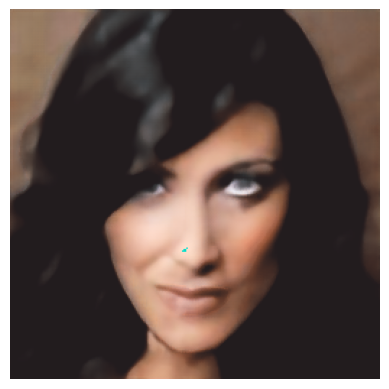

In [ ]:
# prompt: plot /root/.cache/kagglehub/datasets/abduzzami/compare-deblur/versions/1/Compare/Deblurred/deblurred_image100.png

import matplotlib.pyplot as plt
import cv2

img_path = '/root/.cache/kagglehub/datasets/abduzzami/compare-deblur/versions/1/Compare/Deblurred/deblurred_image100.png'
img = cv2.imread(img_path)

if img is not None:
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.axis('off')  # Hide axes
  plt.show()
else:
  print(f"Error: Could not read image at {img_path}")


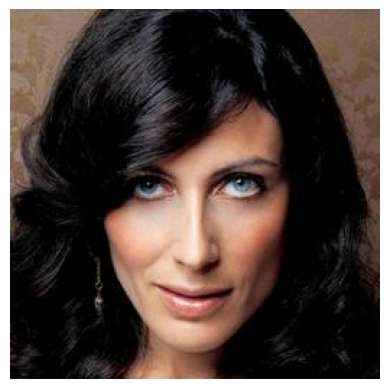

In [9]:
# prompt: plot /root/.cache/kagglehub/datasets/abduzzami/compare-deblur/versions/1/Compare/Deblurred/deblurred_image100.png

import matplotlib.pyplot as plt
import cv2

img_path = '/root/.cache/kagglehub/datasets/abduzzami/compare-deblur/versions/1/Compare/Original/original_image100.png'
img = cv2.imread(img_path)

if img is not None:
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.axis('off')  # Hide axes
  plt.show()
else:
  print(f"Error: Could not read image at {img_path}")


In [11]:
import os
import cv2
import torch
import piq
from torchvision import models, transforms
from tqdm import tqdm

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# InceptionV3 model for feature extraction
inception = models.inception_v3(pretrained=True, transform_input=False).to(device)
inception.fc = torch.nn.Identity()  # Remove final classification layer
inception.eval()

# Image preprocessing
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

def get_inception_features(folder):
    features = []
    for img_name in tqdm(sorted(os.listdir(folder)), desc=f'Processing {os.path.basename(folder)}'):
        img_path = os.path.join(folder, img_name)
        img_bgr = cv2.imread(img_path)
        if img_bgr is None:
            print(f"Failed to read image {img_path}")
            continue

        img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
        img_tensor = transform(img_rgb).unsqueeze(0).to(device)

        with torch.no_grad():
            feat = inception(img_tensor)

        features.append(feat.cpu())

    features = torch.cat(features, dim=0)
    return features

# Define folders
real_folder = path + '/Compare/Original'

folders = [path + '/Compare/CodeFormer',
           path + '/Compare/RestoreFormer',
           path + '/Compare/RestoreFormerPP',
           path + '/Compare/Blurred',
           path + '/Compare/Deblurred',
           path + '/Compare/GFPGAN']

fid_scores = {}

# Create FID metric instance
fid_metric = piq.FID()

# Compute features for real images once
real_features = get_inception_features(real_folder)

for folder in folders:
    fake_features = get_inception_features(folder)

    # Compute FID score using piq.FID()
    fid_score = fid_metric(fake_features, real_features)
    fid_scores[os.path.basename(folder)] = fid_score.item()


# Save results to CSV
import pandas as pd

fid_df = pd.DataFrame(list(fid_scores.items()), columns=["Folder", "FID"])
fid_df.to_csv('fid_scores.csv', index=False)

print("FID scores saved to fid_scores.csv")
print(fid_df)


Processing GFPGAN: 100%|██████████| 200/200 [00:46<00:00,  4.28it/s]


FID scores saved to fid_scores.csv
            Folder         FID
0       CodeFormer  119.310082
1    RestoreFormer  129.253569
2  RestoreFormerPP   89.696856
3          Blurred  185.139407
4        Deblurred  143.059979
5           GFPGAN   97.424298
